In [ ]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
gdp1 = pd.read_csv('09_GDP_table.csv')
gdp2 = pd.read_csv('09_GDP_PPP_table.csv')

In [ ]:
gdp1

,country,2015,2016,2017
0,Argentina,642.5,554.1,637.7
1,Brazil,1799.7,1793.1,2055.0
2,Colombia,291.5,280.0,309.2
3,Dominican Republic,68.2,71.7,75.0
4,Ecuador,99.3,98.6,102.3
5,El Salvador,26.1,26.8,28.0
6,Guatemala,63.8,68.8,75.7
7,Haiti,8.7,8.2,8.6
8,Mexico,1169.6,1076.9,1149.2
9,Nicaragua,12.7,13.2,13.7


In [ ]:
gdp2

,country,2015,2016,2017
0,Argentina,883.9,878.8,920.2
1,Brazil,3224.4,3152.3,3240.3
2,Colombia,666.9,689.2,714.0
3,Dominican Republic,149.9,161.9,172.4
4,Ecuador,184.8,184.2,192.6
5,El Salvador,52.7,54.7,57.0
6,Guatemala,126.2,131.7,137.8
7,Haiti,18.8,19.4,19.9
8,Mexico,2270.7,2366.7,2458.4
9,Nicaragua,32.1,34.1,36.4


In [ ]:
zika = pd.read_csv('zikavirus.csv')
zika.head()

,report_date,location,location_type,data_field,cases
0,2017-01-12,Argentina-Buenos_Aires,province,cumulative_confirmed_imported_cases,0.0
1,2017-01-12,Argentina-CABA,province,cumulative_confirmed_imported_cases,1.0
2,2017-01-12,Argentina-Cordoba,province,cumulative_confirmed_imported_cases,2.0
3,2017-01-12,Argentina-Entre_Rios,province,cumulative_confirmed_imported_cases,0.0
4,2017-01-12,Argentina-Santa_Fe,province,cumulative_confirmed_imported_cases,2.0


In [ ]:

# filter out those rows which does not contain any data
zika = zika.dropna(how = 'all')
  
# Filter all rows for which the report_date is equal to 18437
zika.drop(zika[zika['report_date'] == '18437'].index, inplace = True)

# covert string to an float
zika['cases'] = zika['cases'].astype(float)

# Replace nan value with 0,
zika['cases'] = zika['cases'].fillna(0)

# covert float to an int
zika['cases'] = zika['cases'].astype(int)

# Convert our report_date columns to datetime datatype
zika['report_date'] = pd.to_datetime(zika['report_date'], format="%Y-%m-%d")

# create new year and month column from datetime
zika['year'] = pd.DatetimeIndex(zika['report_date']).year

zika.head()

,report_date,location,location_type,data_field,cases,year
0,2017-01-12,Argentina-Buenos_Aires,province,cumulative_confirmed_imported_cases,0,2017.0
1,2017-01-12,Argentina-CABA,province,cumulative_confirmed_imported_cases,1,2017.0
2,2017-01-12,Argentina-Cordoba,province,cumulative_confirmed_imported_cases,2,2017.0
3,2017-01-12,Argentina-Entre_Rios,province,cumulative_confirmed_imported_cases,0,2017.0
4,2017-01-12,Argentina-Santa_Fe,province,cumulative_confirmed_imported_cases,2,2017.0


In [ ]:
# create new column country and state
country = []
state = []

# iterate location
for mystring in zika['location']:
    first_partitioned_string = mystring.rpartition('-')
    country_name = first_partitioned_string[0]
    state_name = first_partitioned_string[2]
    country.append(country_name.strip())
    state.append(state_name.strip())
    
zika.insert(1, "country",country, True)  
zika.insert(2, "state",state, True)
zika = zika.drop(['location', 'location_type', 'report_date', 'data_field', 'state'],axis=1)
zika.head()

,country,cases,year
0,Argentina,0,2017.0
1,Argentina,1,2017.0
2,Argentina,2,2017.0
3,Argentina,0,2017.0
4,Argentina,2,2017.0


In [ ]:
# Location (countries) wise total cases
zika_location = zika.groupby(['country', 'year']).cases.agg([sum])
zika_location = zika_location.reset_index()
zika_location


,country,year,sum
0,,2015.0,19452
1,,2016.0,3255781
2,,2017.0,552168
3,Argentina,2016.0,5120
4,Argentina,2017.0,973
...,...,...,...
117,United_States,2016.0,3188580
118,United_States,2017.0,6319787
119,United_States-Florida,2016.0,722
120,United_States_Virgin_Islands,2016.0,40660


In [ ]:
gdpx = gdp2.melt(id_vars=["country"], var_name="year", value_name="gdp")
gdpx


,country,year,gdp
0,Argentina,2015,883.9
1,Brazil,2015,3224.4
2,Colombia,2015,666.9
3,Dominican Republic,2015,149.9
4,Ecuador,2015,184.8
5,El Salvador,2015,52.7
6,Guatemala,2015,126.2
7,Haiti,2015,18.8
8,Mexico,2015,2270.7
9,Nicaragua,2015,32.1


In [ ]:
gdpx['country'].replace(' ', '_', regex=True, inplace=True)
gdpx.head()

,country,year,gdp
0,Argentina,2015,883.9
1,Brazil,2015,3224.4
2,Colombia,2015,666.9
3,Dominican_Republic,2015,149.9
4,Ecuador,2015,184.8


In [ ]:
gdpx['year'] = gdpx.year.astype(float)

In [ ]:
gdpxcases = pd.merge(zika_location, gdpx, on= ['country', 'year'])
gdpxcases

,country,year,sum,gdp
0,Argentina,2016.0,5120,878.8
1,Argentina,2017.0,973,920.2
2,Brazil,2016.0,1579934,3152.3
3,Colombia,2016.0,715086,689.2
4,Colombia,2017.0,66863,714.0
5,Dominican_Republic,2016.0,249590,161.9
6,Dominican_Republic,2017.0,4940,172.4
7,Ecuador,2016.0,32027,184.2
8,Ecuador,2017.0,62879,192.6
9,El_Salvador,2015.0,10053,52.7


In [ ]:
gdpxcases.shape

(24, 4)

(array([2014.75, 2015.  , 2015.25, 2015.5 , 2015.75, 2016.  , 2016.25,
        2016.5 , 2016.75, 2017.  , 2017.25]),
 <a list of 11 Text major ticklabel objects>)

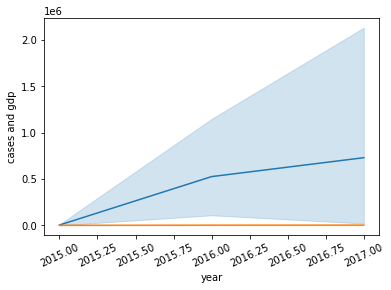

In [ ]:
# sns.lineplot(x = "year", y = "sum", data = gdpxcases)
# sns.lineplot(x = "year", y = "gdp", data = gdpxcases)
# plt.ylabel("cases and gdp")
# plt.xticks(rotation = 25)